# What is the average number of aces per match?

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

statistics_dataframe = pd.DataFrame()
for file in os.listdir("raw/raw_statistics_parquet"):
    single_stats = pd.read_parquet("raw/raw_statistics_parquet/" + file)
    statistics_dataframe = pd.concat([statistics_dataframe, single_stats], axis= 'rows', ignore_index=True)

statistics_dataframe.head(10)

,match_id,period,statistic_category_name,statistic_name,home_stat,away_stat,compare_code,statistic_type,value_type,home_value,away_value,home_total,away_total
0,11674074,ALL,service,aces,1,2,2,positive,event,1,2,NaN,NaN
1,11674074,ALL,service,double_faults,1,3,2,negative,event,1,3,NaN,NaN
2,11674074,ALL,service,first_serve,34/52 (65%),26/57 (46%),1,positive,team,34,26,52.0,57.0
3,11674074,ALL,service,second_serve,17/18 (94%),28/31 (90%),1,positive,team,17,28,18.0,31.0
4,11674074,ALL,service,first_serve_points,25/34 (74%),11/26 (42%),1,positive,team,25,11,34.0,26.0
5,11674074,ALL,service,second_serve_points,14/18 (78%),18/31 (58%),1,positive,team,14,18,18.0,31.0
6,11674074,ALL,service,service_games_played,10,9,1,positive,event,10,9,NaN,NaN
7,11674074,ALL,service,break_points_saved,0/1 (0%),1/5 (20%),2,positive,team,0,1,1.0,5.0
8,11674074,ALL,points,total,67,42,1,positive,event,67,42,NaN,NaN
9,11674074,ALL,points,service_points_won,39,29,1,positive,event,39,29,NaN,NaN


In [3]:
# فیلتر کردن ردیف‌های مربوط به آیس‌ها
aces_data = statistics_dataframe[statistics_dataframe['statistic_name'] == 'aces']

In [5]:
# فیلتر کردن ردیف‌های مربوط به آیس‌ها
aces_data = statistics_dataframe[statistics_dataframe['statistic_name'] == 'aces']

# جمع‌آوری تعداد آیس‌ها از دو طرف (تیم خانه و تیم میهمان)
# با فرض اینکه هر ردیف نمایانگر یک مسابقه باشد
total_home_aces = aces_data['home_value'].sum()  # مجموع آیس‌های تیم خانه
total_away_aces = aces_data['away_value'].sum()  # مجموع آیس‌های تیم میهمان

# جمع آوری کل آیس‌ها
total_aces = total_home_aces + total_away_aces

# تعداد منحصر به فرد مسابقات
total_matches = aces_data['match_id'].nunique()  # تعداد منحصر به فرد مسابقات

# محاسبه میانگین آیس‌ها در هر مسابقه
if total_matches > 0:  # جلوگیری از تقسیم بر صفر
    average_aces_per_match = total_aces / total_matches
else:
    average_aces_per_match = 0

print(f"Average aces per match: {average_aces_per_match:.2f}")

Average aces per match: 8.00


In [4]:
aces_data

,match_id,period,statistic_category_name,statistic_name,home_stat,away_stat,compare_code,statistic_type,value_type,home_value,away_value,home_total,away_total
0,11674074,ALL,service,aces,1,2,2,positive,event,1,2,NaN,NaN
20,11674074,1ST,service,aces,0,2,2,positive,event,0,2,NaN,NaN
37,11674074,2ND,service,aces,1,0,1,positive,event,1,0,NaN,NaN
53,11674103,ALL,service,aces,5,2,1,positive,event,5,2,NaN,NaN
73,11674103,1ST,service,aces,2,2,3,positive,event,2,2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12175,11703524,1ST,service,aces,3,0,1,positive,event,3,0,NaN,NaN
12192,11703524,2ND,service,aces,1,0,1,positive,event,1,0,NaN,NaN
12209,11703525,ALL,service,aces,1,1,3,positive,event,1,1,NaN,NaN
12229,11703525,1ST,service,aces,1,0,1,positive,event,1,0,NaN,NaN


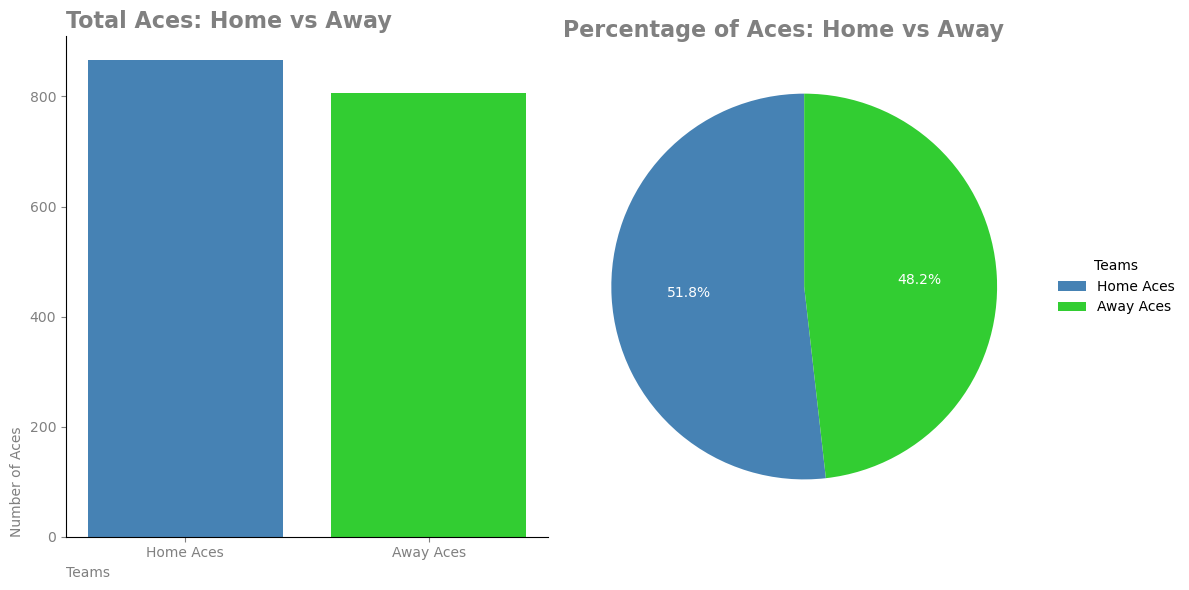

In [18]:

# داده‌های مربوط به آیس‌ها
labels = ['Home Aces', 'Away Aces']
values = [total_home_aces, total_away_aces]

# تنظیمات اندازه نمودار
plt.figure(figsize=(12, 6))

# رسم نمودار ستونی
plt.subplot(1, 2, 1)
plt.bar(labels, values, color=['#4682b4', '#32cd32'])
plt.title('Total Aces: Home vs Away', fontsize=16, color='gray', loc='left', fontweight='bold')
plt.xlabel('Teams', fontsize=10, color='gray', loc='left')
plt.ylabel('Number of Aces', fontsize=10, color='gray', loc='bottom')
# تغییر رنگ اعداد و خطوط مدرج به خاکستری
plt.tick_params(colors='gray')
# حذف حاشیه‌های راست و بالا
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)


# رسم نمودار دایره‌ای برای نمایش نسبت آیس‌ها
plt.subplot(1, 2, 2)
wedges, _, autotexts = plt.pie(values, autopct='%1.1f%%', colors=['#4682b4', '#32cd32'], startangle=90)

# افزودن legend برای برچسب‌های Home و Away به جای قرار دادن آن‌ها روی نمودار
plt.legend(wedges, labels, title="Teams", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), frameon=False)

# تغییر اندازه و استایل متن‌های درصد روی نمودار
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(10)

plt.title('Percentage of Aces: Home vs Away', fontsize=16, color='gray', loc='left', fontweight='bold')

# نمایش نمودارها
plt.tight_layout()
plt.show()
